## Load processed data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# load data frames
df_obesity = pd.read_pickle(os.path.join("processed_data", "df_obesity.pkl"))


df = pd.read_pickle(os.path.join("processed_data", "df_merged.pkl"))

# combined data frame with all data
df.head()

,country,obesity_rate,kilocalories,gdp,urbanization
0,Afghanistan,4.5,2040,520.252064,25.020
1,Albania,22.3,3360,4124.055390,58.421
2,Algeria,26.6,3322,3967.199451,71.459
3,Angola,6.8,2385,1709.515534,64.149
4,Antigua and Barbuda,19.1,2445,15862.651663,24.846


## Average world's obesity throughout the years

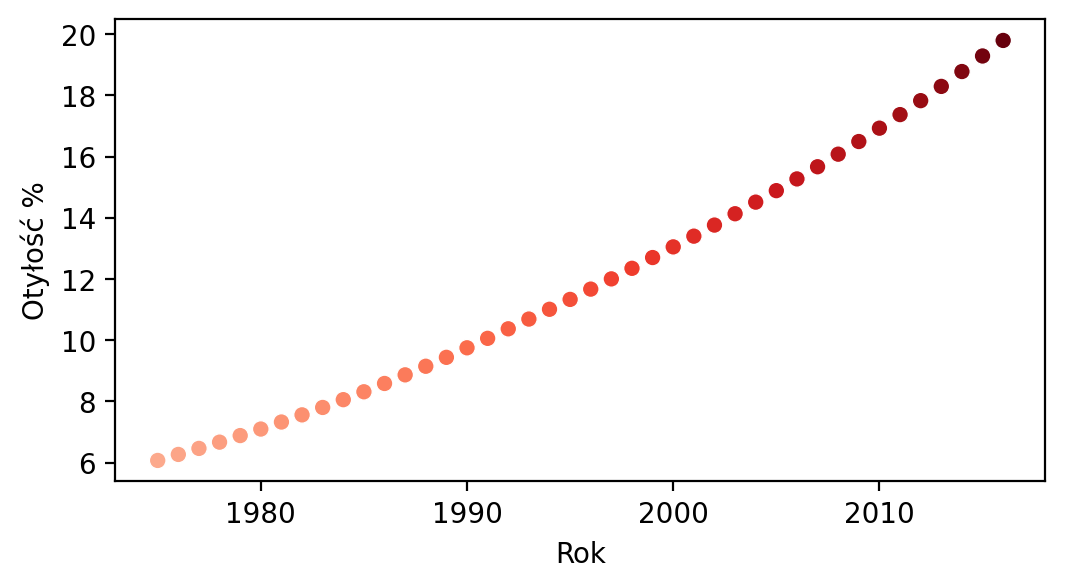

In [3]:
average_obesity_rates = pd.DataFrame(df_obesity.groupby("year")["obesity_rate"].mean())


plt.figure(figsize=(6, 3), dpi=200)
ax = sns.scatterplot(
    data=average_obesity_rates,
    x=average_obesity_rates.index,
    y=average_obesity_rates["obesity_rate"],
    hue="obesity_rate",
    hue_norm=(0, average_obesity_rates.max()),
    palette="Reds",
    legend=None,
)
ax.set(xlabel="Rok")
ax.set(ylabel="Otyłość %")

plt.show()

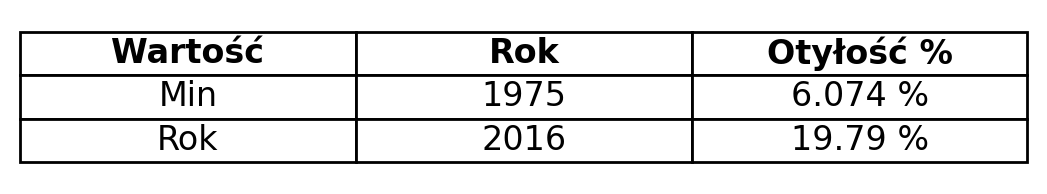

In [4]:
data = [
    ["Wartość", "Rok", "Otyłość %"],
    [
        "Min",
        f"{average_obesity_rates.idxmin().values[0]}",
        f"{round(average_obesity_rates.min().values[0],3)} %",
    ],
    [
        "Rok",
        f"{average_obesity_rates.idxmax().values[0]}",
        f"{round(average_obesity_rates.max().values[0],3)} %",
    ],
]

fig, ax = plt.subplots(figsize=(5, 1), dpi=200)

ax.axis("off")

table = ax.table(cellText=data, loc="center", cellLoc="center")

table[0, 0].set_text_props(weight="bold")
table[0, 1].set_text_props(weight="bold")
table[0, 2].set_text_props(weight="bold")

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.3, 1.3)

plt.show()

### Average obesity trend

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

x = average_obesity_rates.index.values.reshape(-1, 1)
y = average_obesity_rates.values

Linear MSE: 0.19422854839446585, quadratic MSE: 0.00137198791050788


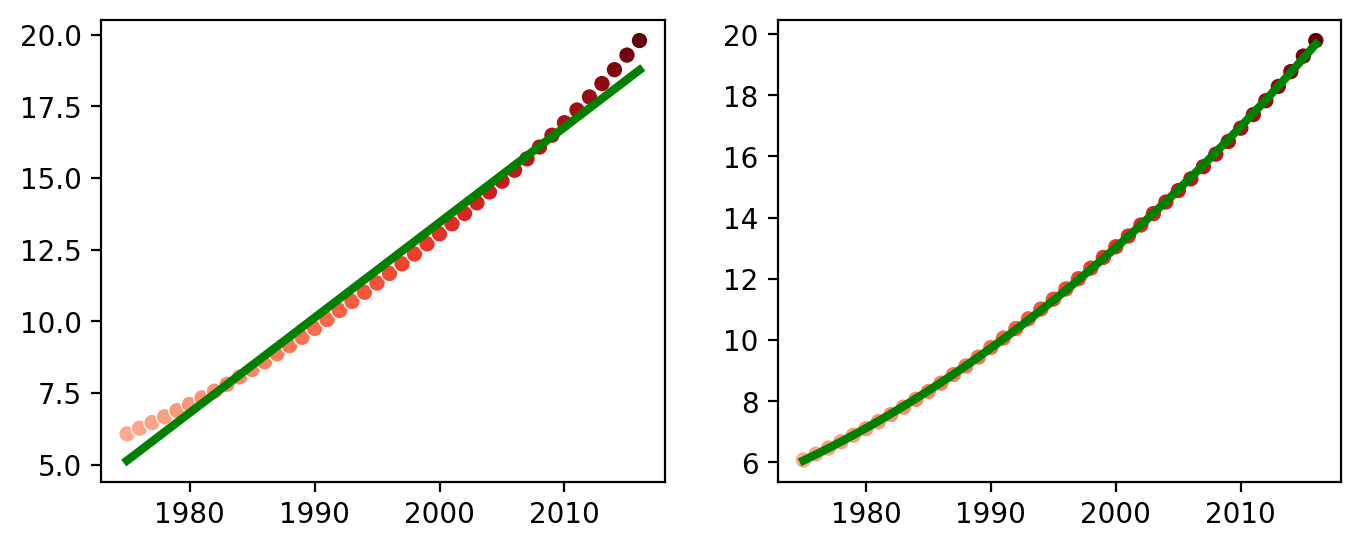

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), dpi=200)


linear_ax = sns.scatterplot(
    data=average_obesity_rates,
    x=average_obesity_rates.index,
    y=average_obesity_rates["obesity_rate"],
    hue="obesity_rate",
    hue_norm=(0, average_obesity_rates.max()),
    palette="Reds",
    legend=None,
    ax=axes[0],
)
linear_ax.set_ylabel("")
linear_ax.set_xlabel("")

quadratic_ax = sns.scatterplot(
    data=average_obesity_rates,
    x=average_obesity_rates.index,
    y=average_obesity_rates["obesity_rate"],
    hue="obesity_rate",
    hue_norm=(0, average_obesity_rates.max()),
    palette="Reds",
    legend=None,
    ax=axes[1],
)
quadratic_ax.set_ylabel("")
quadratic_ax.set_xlabel("")


linear_model = LinearRegression()
linear_model.fit(x, y)
linear_mse = mean_squared_error(y, linear_model.predict(x))


quadratic_model = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
quadratic_model.fit(gen_features.fit_transform(x.reshape(-1, 1)), y)

quadratic_mse = mean_squared_error(
    y, quadratic_model.predict(gen_features.fit_transform(x.reshape(-1, 1)))
)


x_axis = np.linspace(start=x.min(), stop=x.max(), num=300)
linear_pred = linear_model.predict(x_axis.reshape(-1, 1))
quadratic_pred = quadratic_model.predict(
    gen_features.fit_transform(x_axis.reshape(-1, 1))
)


linear_ax.plot(
    x_axis,
    linear_pred,
    "g",
    linewidth=3,
)
quadratic_ax.plot(x_axis, quadratic_pred, "g", linewidth=3)
print(f"Linear MSE: {linear_mse}, quadratic MSE: {quadratic_mse}")

## Obesity in 2016

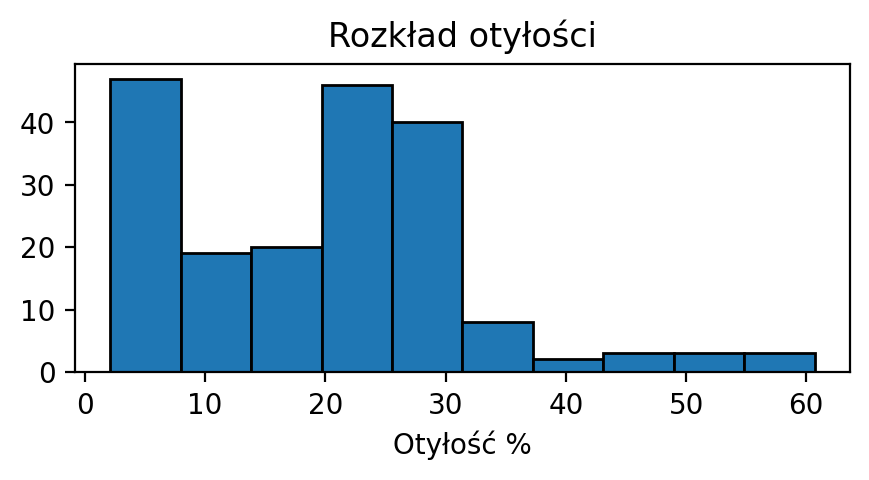

In [7]:
plt.figure(figsize=(5, 2), dpi=200)
plt.hist(df_obesity[df_obesity["year"] == 2016]["obesity_rate"], edgecolor="black")
plt.xlabel("Otyłość %")

plt.title("Rozkład otyłości")


plt.show()

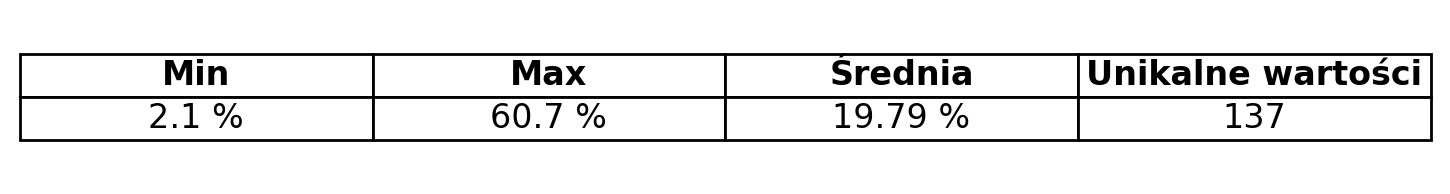

In [8]:
data = [
    ["Min", "Max", "Średnia", "Unikalne wartości"],
    [
        f"{df_obesity[df_obesity['year']==2016]['obesity_rate'].min()} %",
        f"{df_obesity[df_obesity['year']==2016]['obesity_rate'].max()} %",
        f"{round(df_obesity[df_obesity['year']==2016]['obesity_rate'].mean(),3)} %",
        len(df_obesity[df_obesity["year"] == 2016]["obesity_rate"].unique()),
    ],
]

fig, ax = plt.subplots(figsize=(7, 1), dpi=200)

ax.axis("off")

table = ax.table(cellText=data, loc="center", cellLoc="center")


for i in range(len(data[0])):
    table[0, i].set_text_props(weight="bold")

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.3, 1.3)

plt.show()

## Calorie intake

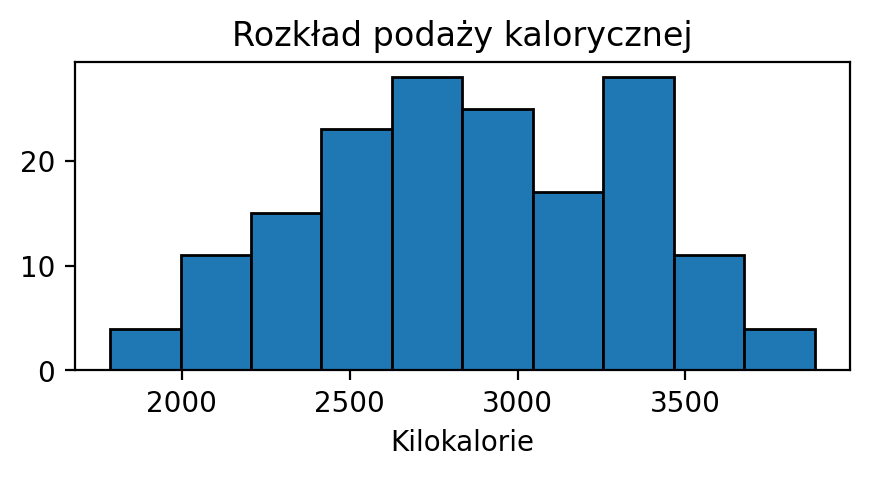

In [9]:
plt.figure(figsize=(5, 2), dpi=200)
plt.hist(df["kilocalories"], edgecolor="black")
plt.xlabel("Kilokalorie")

plt.title("Rozkład podaży kalorycznej")


plt.show()

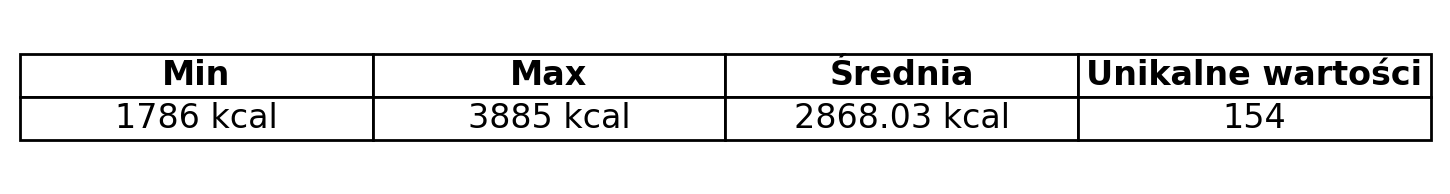

In [10]:
data = [
    ["Min", "Max", "Średnia", "Unikalne wartości"],
    [
        f"{df['kilocalories'].min()} kcal",
        f"{df['kilocalories'].max()} kcal",
        f"{round(df['kilocalories'].mean(),3)} kcal",
        len(df["kilocalories"].unique()),
    ],
]

fig, ax = plt.subplots(figsize=(7, 1), dpi=200)

ax.axis("off")

table = ax.table(cellText=data, loc="center", cellLoc="center")


for i in range(len(data[0])):
    table[0, i].set_text_props(weight="bold")

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.3, 1.3)

plt.show()

## GDP per capita

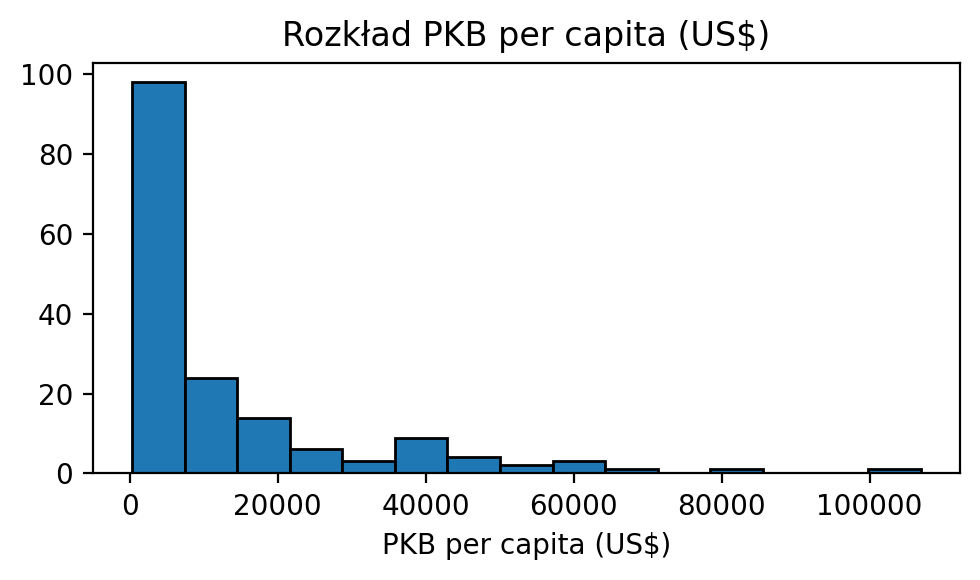

In [11]:
plt.figure(figsize=(5, 3), dpi=200)
plt.hist(df["gdp"], bins=15, edgecolor="black")

plt.xlabel("PKB per capita (US$)")
plt.title("Rozkład PKB per capita (US$)")


plt.tight_layout()
plt.show()

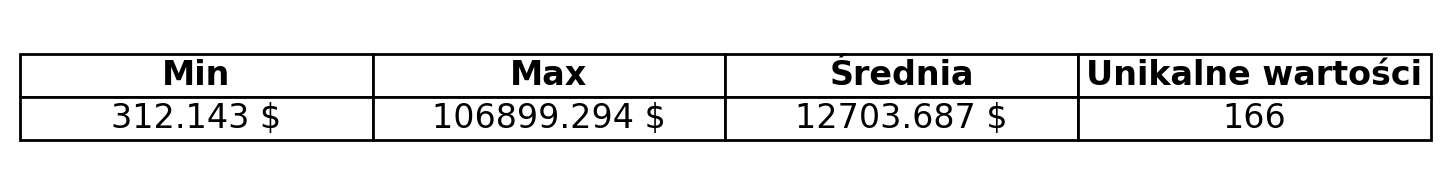

In [12]:
data = [
    ["Min", "Max", "Średnia", "Unikalne wartości"],
    [
        f"{round(df['gdp'].min(),3)} $",
        f"{round(df['gdp'].max(),3)} $",
        f"{round(df['gdp'].mean(),3)} $",
        len(df["gdp"].unique()),
    ],
]

fig, ax = plt.subplots(figsize=(7, 1), dpi=200)

ax.axis("off")

table = ax.table(cellText=data, loc="center", cellLoc="center")


for i in range(len(data[0])):
    table[0, i].set_text_props(weight="bold")

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.3, 1.3)

plt.show()

## Urbanization

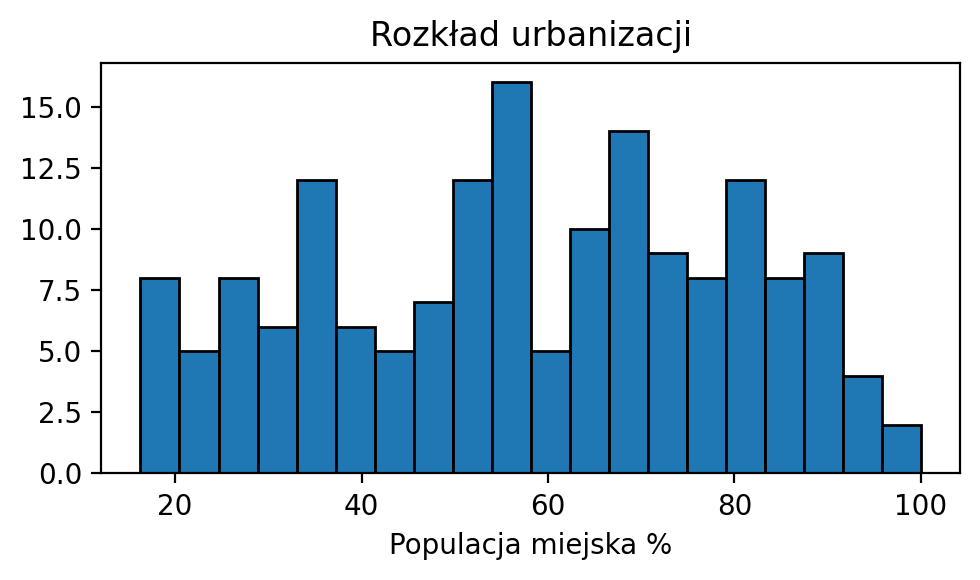

In [13]:
plt.figure(figsize=(5, 3), dpi=200)
plt.hist(df["urbanization"], edgecolor="black", bins=20)

plt.xlabel("Populacja miejska %")
plt.title("Rozkład urbanizacji")

plt.tight_layout()
plt.show()

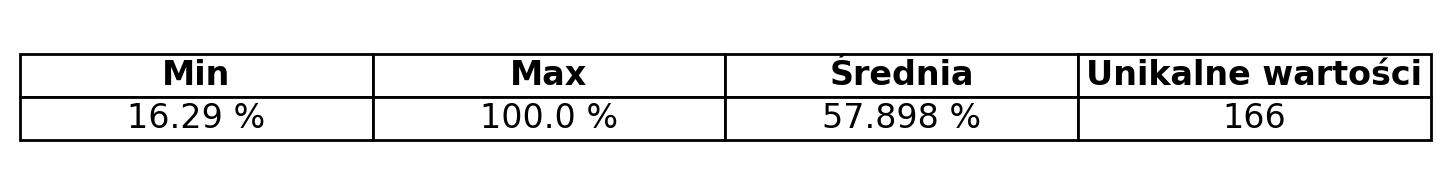

In [14]:
data = [
    ["Min", "Max", "Średnia", "Unikalne wartości"],
    [
        f"{round(df['urbanization'].min(),3)} %",
        f"{round(df['urbanization'].max(),3)} %",
        f"{round(df['urbanization'].mean(),3)} %",
        len(df["urbanization"].unique()),
    ],
]

fig, ax = plt.subplots(figsize=(7, 1), dpi=200)

ax.axis("off")

table = ax.table(cellText=data, loc="center", cellLoc="center")


for i in range(len(data[0])):
    table[0, i].set_text_props(weight="bold")

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.3, 1.3)

plt.show()

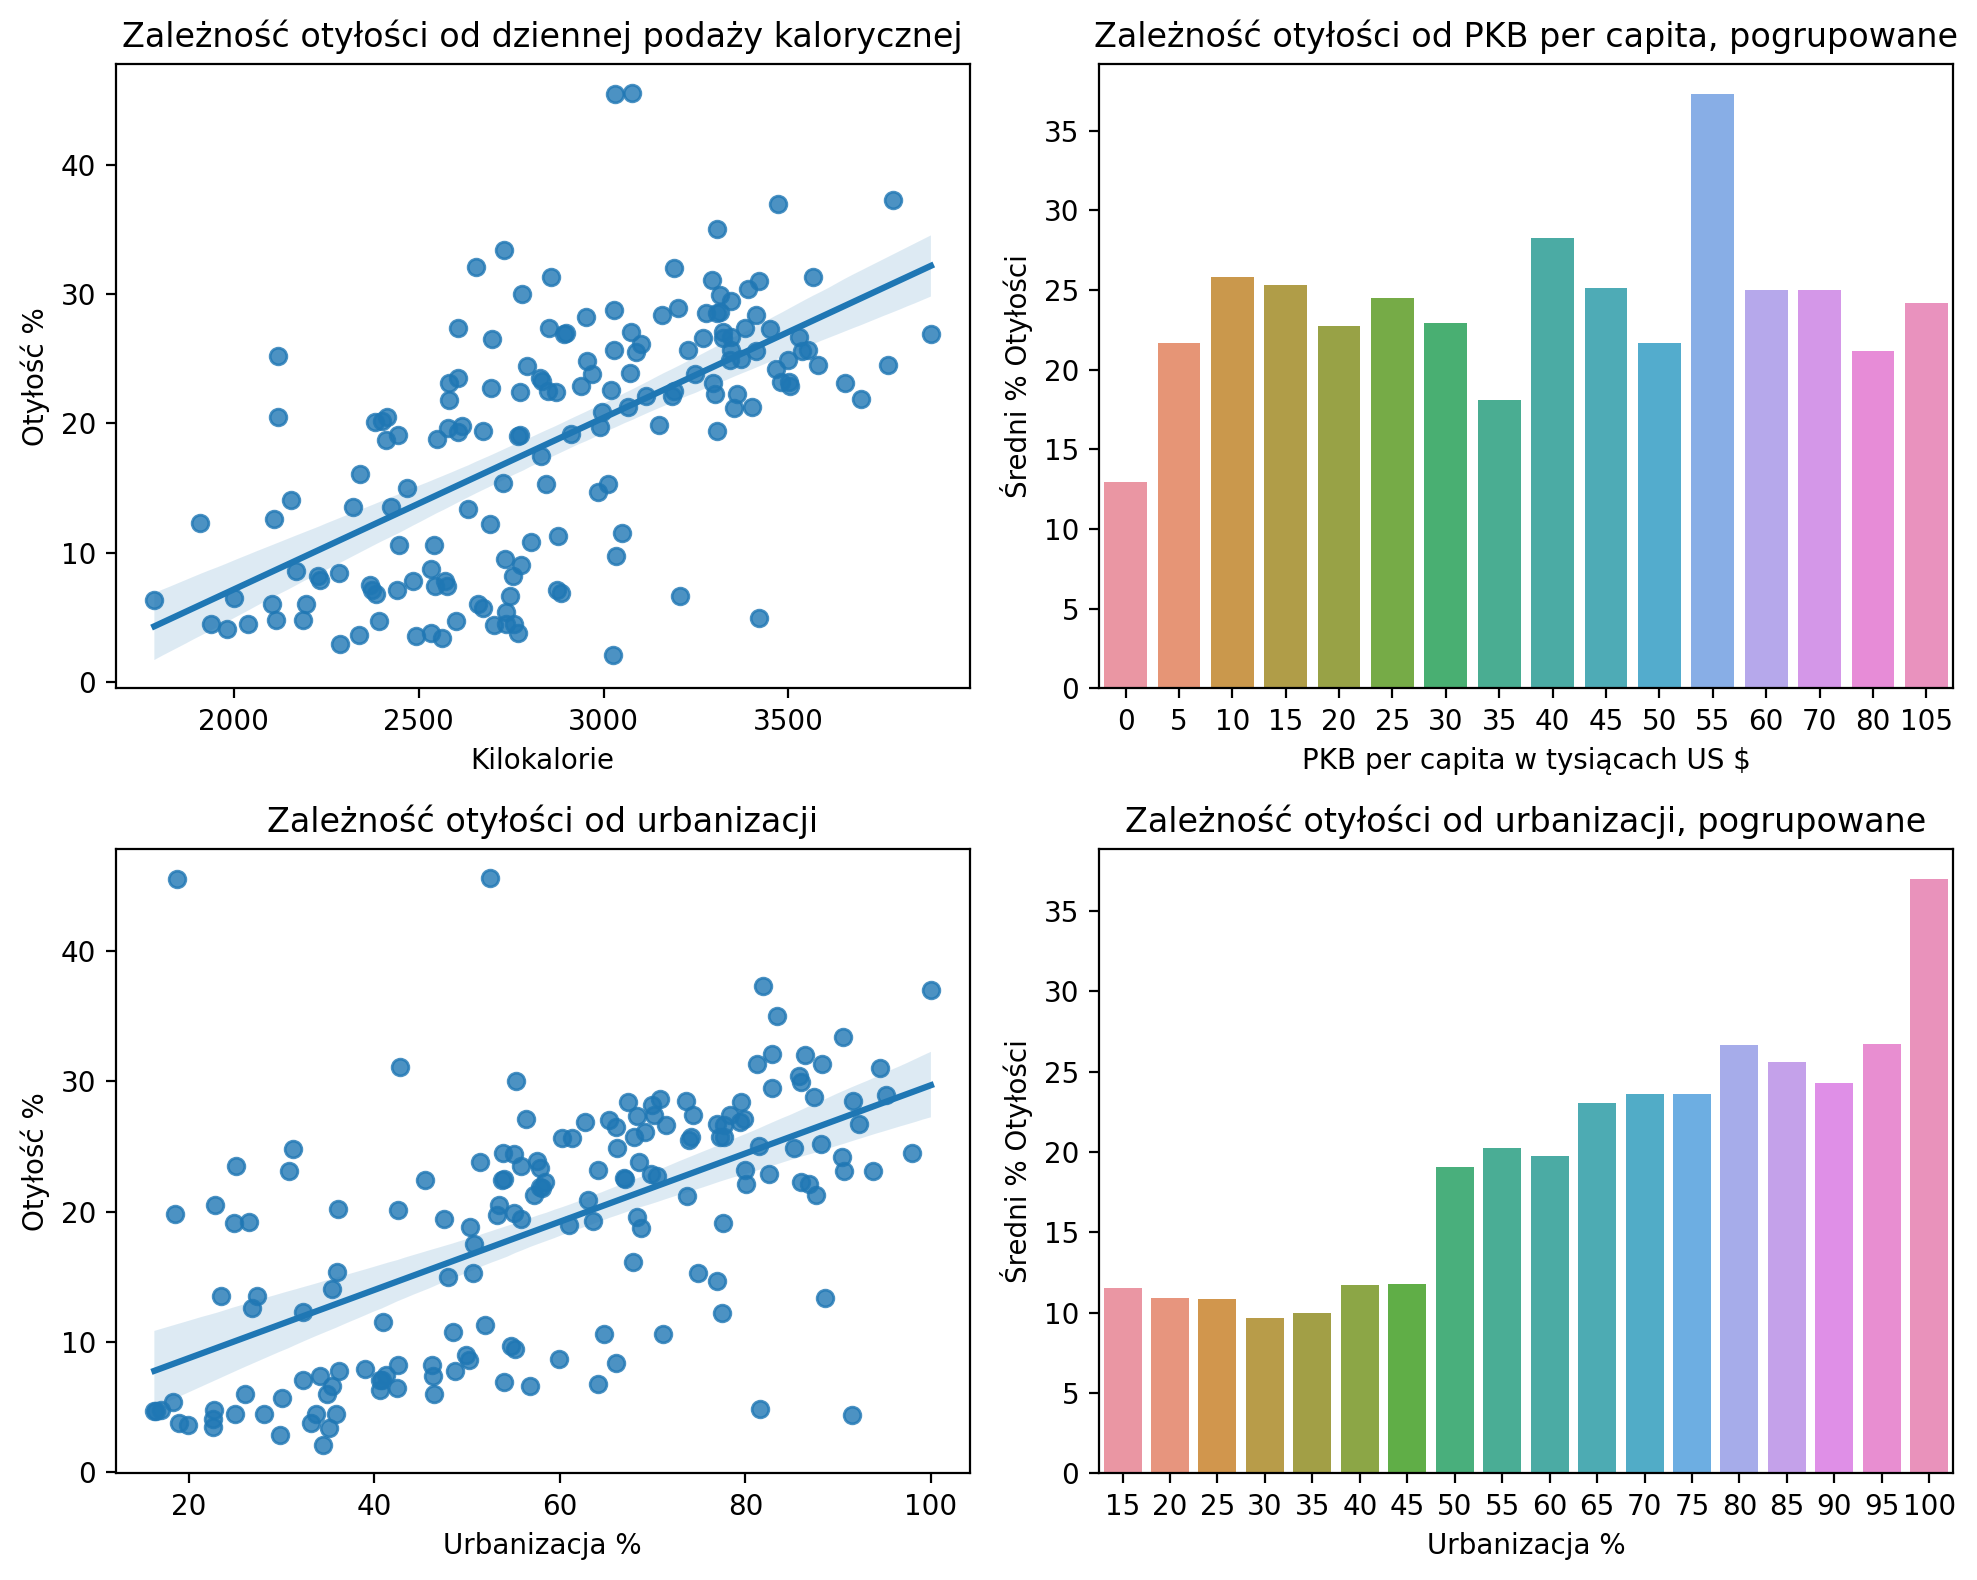

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), dpi=200)
sns.regplot(
    data=df,
    x="kilocalories",
    y="obesity_rate",
    ax=axes[0, 0],
)

axes[0, 0].set_xlabel("Kilokalorie")
axes[0, 0].set_ylabel("Otyłość %")
axes[0, 0].set_title("Zależność otyłości od dziennej podaży kalorycznej")

gdp_categorized = df.copy()
gdp_categorized["gdp_cat"] = ((gdp_categorized["gdp"] // 5000) * 5).astype(int)

gdp_categorized = (
    gdp_categorized[["obesity_rate", "gdp_cat"]]
    .groupby(["gdp_cat"], as_index=False)
    .mean()
)


sns.barplot(
    data=gdp_categorized,
    x="gdp_cat",
    y="obesity_rate",
    ax=axes[0, 1],
)

axes[0, 1].set_xlabel("PKB per capita w tysiącach US $")
axes[0, 1].set_ylabel("Średni % Otyłości")
axes[0, 1].set_title("Zależność otyłości od PKB per capita, pogrupowane")


sns.regplot(
    data=df,
    x="urbanization",
    y="obesity_rate",
    ax=axes[1, 0],
)

axes[1, 0].set_xlabel("Urbanizacja %")
axes[1, 0].set_ylabel("Otyłość %")
axes[1, 0].set_title("Zależność otyłości od urbanizacji")


urbanization_categorized = df.copy()
urbanization_categorized["urbanization_cat"] = (
    (urbanization_categorized["urbanization"] // 5) * 5
).astype(int)
urbanization_categorized = (
    urbanization_categorized[["obesity_rate", "urbanization_cat"]]
    .groupby(["urbanization_cat"], as_index=False)
    .mean()
)

sns.barplot(
    data=urbanization_categorized,
    x="urbanization_cat",
    y="obesity_rate",
    ax=axes[1, 1],
)

axes[1, 1].set_xlabel("Urbanizacja %")
axes[1, 1].set_ylabel("Średni % Otyłości")
axes[1, 1].set_title("Zależność otyłości od urbanizacji, pogrupowane")

plt.tight_layout()

## Correlation matrix

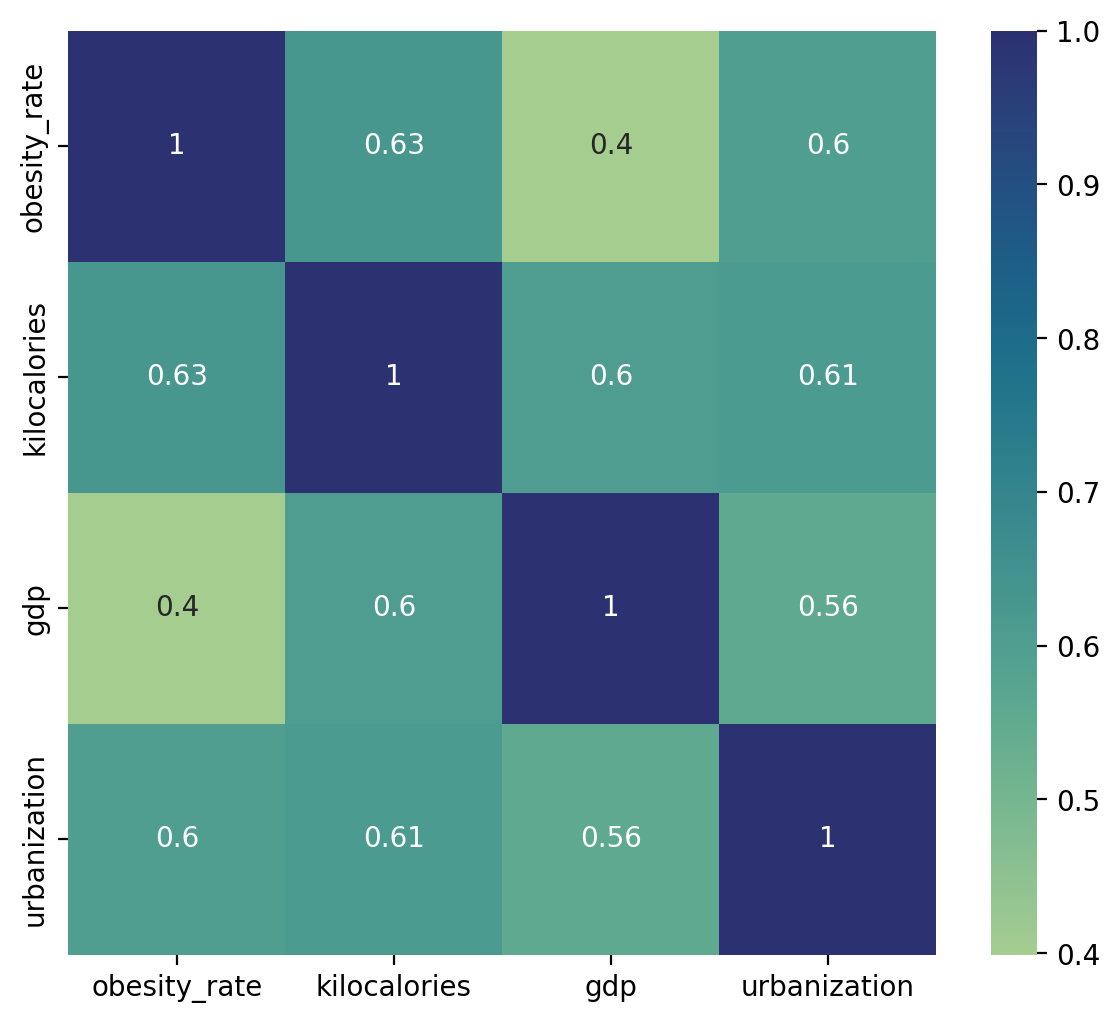

,obesity_rate,kilocalories,gdp,urbanization
obesity_rate,1.000000,0.627690,0.399103,0.599923
kilocalories,0.627690,1.000000,0.603364,0.614851
gdp,0.399103,0.603364,1.000000,0.556434
urbanization,0.599923,0.614851,0.556434,1.000000


In [16]:
corr_matrix = df[["obesity_rate", "kilocalories", "gdp", "urbanization"]].corr()
plt.figure(figsize=(7, 6), dpi=200)
sns.heatmap(corr_matrix, annot=True, cmap="crest")
plt.title("")
plt.show()
corr_matrix